# Challenge 3 - Facial Expression Classification
In the third and last challenge we are given 20 000 training images and labels and 10 000 test images. They are 35x35 pixel each and are of emoji faces and the labels correspond to their emotional state, which we have to predict on the test set.

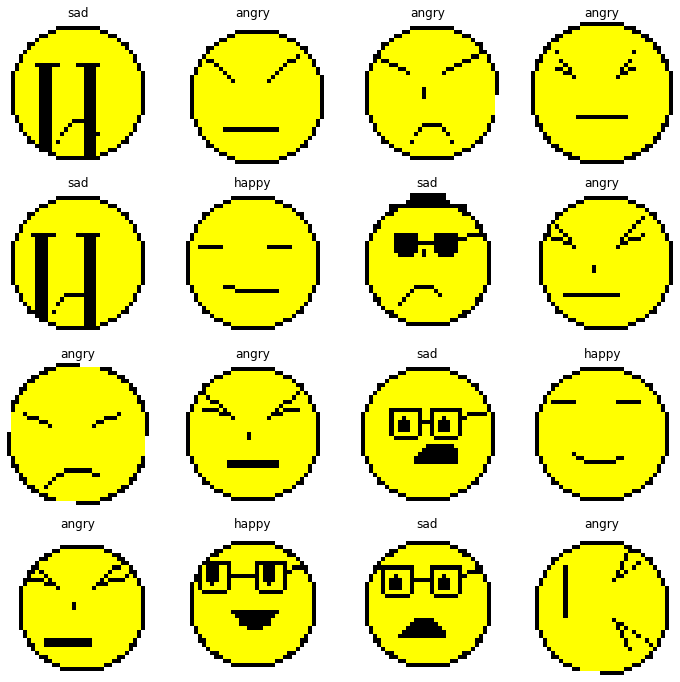

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

X = np.load("data_train_Facial.npy", allow_pickle = True)
y = np.loadtxt("true_labels_Facial_train.csv", delimiter = ",")

color_map = colors.ListedColormap(["white", "yellow", "black"])
emotions = ["happy", "sad", "angry"]

plt.figure(figsize = (12, 12))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(X[k], cmap = color_map)
    plt.title(emotions[int(y[k])])
    plt.axis("off")
plt.show()

We will split the given training data into our own training and test sets with an 80-20% split.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### AutoKeras Image Regressor
Since the automatic machine learning model worked really good in the last challenge, we obted for an automatic implementation of keras called autokeras. The code below tries to find the best hyperparameters of an image regressor in 100 tries with 1000 epochs for each try.

In [28]:
import autokeras as ak
#reg = ak.ImageRegressor(project_name = "image_regressor_training")
#reg.fit(X_train, y_train)
#model = reg.export_model()
#model.save("image_regressor", save_format = "tf")

from tensorflow.keras.models import load_model
model = load_model("image_regressor", custom_objects = ak.CUSTOM_OBJECTS)

### Analysis
Below you can find the trained architecture with its number of layers used, the number of neurons in each layer, optimizer, learning rate, activation functions, etc.

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35, 35)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 35, 35)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 35, 35, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 35, 35, 1)         3         
_________________________________________________________________
random_flip (RandomFlip)     (None, 35, 35, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 31, 31, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       102656

Let's see how it performs on our test set. Since we trained a regressor we need to round the results to the nearest integer to get the classification.

In [30]:
y_predicted = model.predict(X_test).flatten()
accuracy = np.sum(y_test == np.round(y_predicted)) / y_test.shape[0]
print("Image Regressor Accuracy:", accuracy)

Image Regressor Accuracy: 1.0


Altough the model achieves 100 % accuracy on our test set we still want to see where it is furthest from the ground truth. Since we trained a regressor instead of a classifier we can interpret the error of the prediction float to the actual expression integer as its confidence. The lowest confidence score and the associated face are given below.

Lowest confidence: 0.048674941062927246


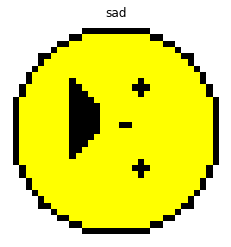

In [54]:
errors = np.abs(y_predicted - y_test)
index = np.argmax(errors)
print("Lowest confidence:", errors[index])
plt.imshow(X_test[index], cmap = cmap)
plt.title(emotions[int(y[index])])
plt.axis("off")
plt.show()

### Save Prediction
The only thing left to do is save the prediction on the given test data.

In [32]:
data = np.load("data_test_Facial.npy", allow_pickle = True)
prediction = np.round(model.predict(data).flatten())
np.savetxt("ToTheMooners_prediction", prediction, delimiter = ",")